# Python only Notebook - EDA Part 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
house = pd.read_csv('kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Plot 1- Histogram

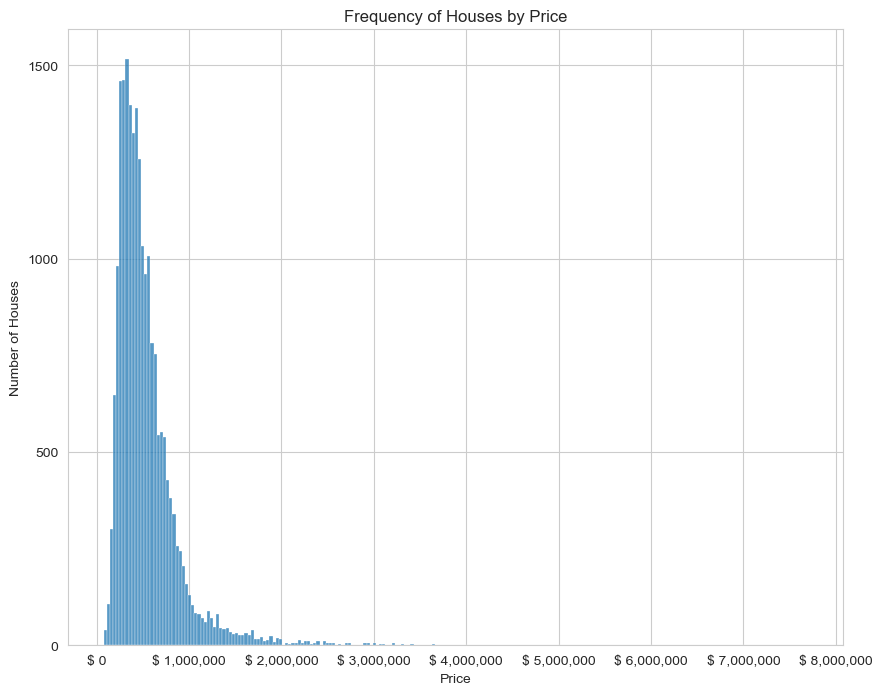

In [5]:
sns.set_style("whitegrid")
fig = plt.subplots(figsize = (10,8))
ax = sns.histplot(house['price'],bins = 225)
ax.xaxis.set_major_formatter('${x: ,.0f}')
ax.set_yticks(np.arange(0,ax.get_ylim()[1],500))
plt.title('Frequency of Houses by Price')
plt.xlabel('Price')
plt.ylabel('Number of Houses')
plt.show()

## Plot 2 - Correlation Matrix

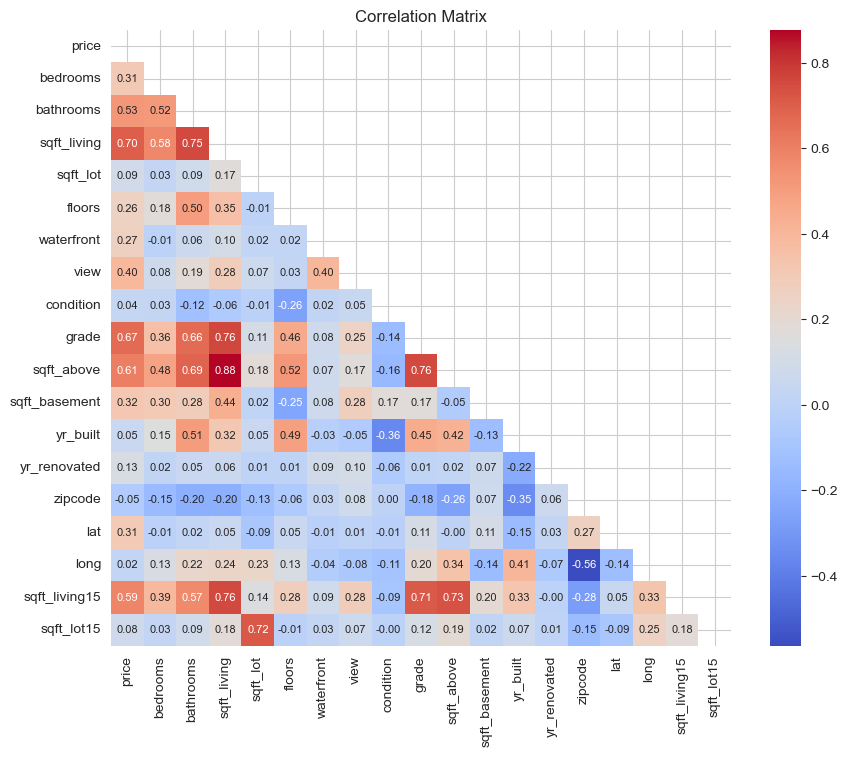

In [7]:
fig = plt.subplots(figsize = (10,8))
sns.heatmap(house.iloc[:,2:].corr(),annot = True, 
            annot_kws={'size':8} ,fmt = ".2f" ,cmap='coolwarm',
            mask = np.triu(house.iloc[:,2:].corr()))
plt.title('Correlation Matrix')
plt.show()

## Plot 3 - Bar Plot to Analyze Bedrooms

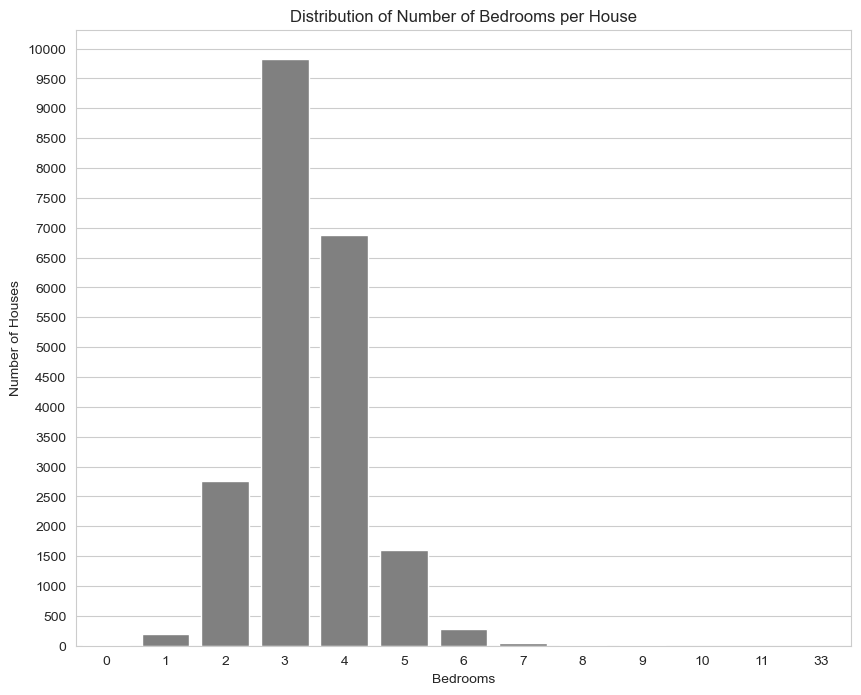

In [9]:
sns.set_style("whitegrid")
fig = plt.subplots(figsize = (10,8))
ax = sns.countplot(house,x ='bedrooms',color = 'grey')
ax.set_yticks(np.arange(0,ax.get_ylim()[1],500))
plt.title('Distribution of Number of Bedrooms per House')
plt.xlabel('Bedrooms')
plt.ylabel('Number of Houses')
plt.show()

## Plot 4 - Box An Whisker Plot with Scatter to Analyze Bathrooms

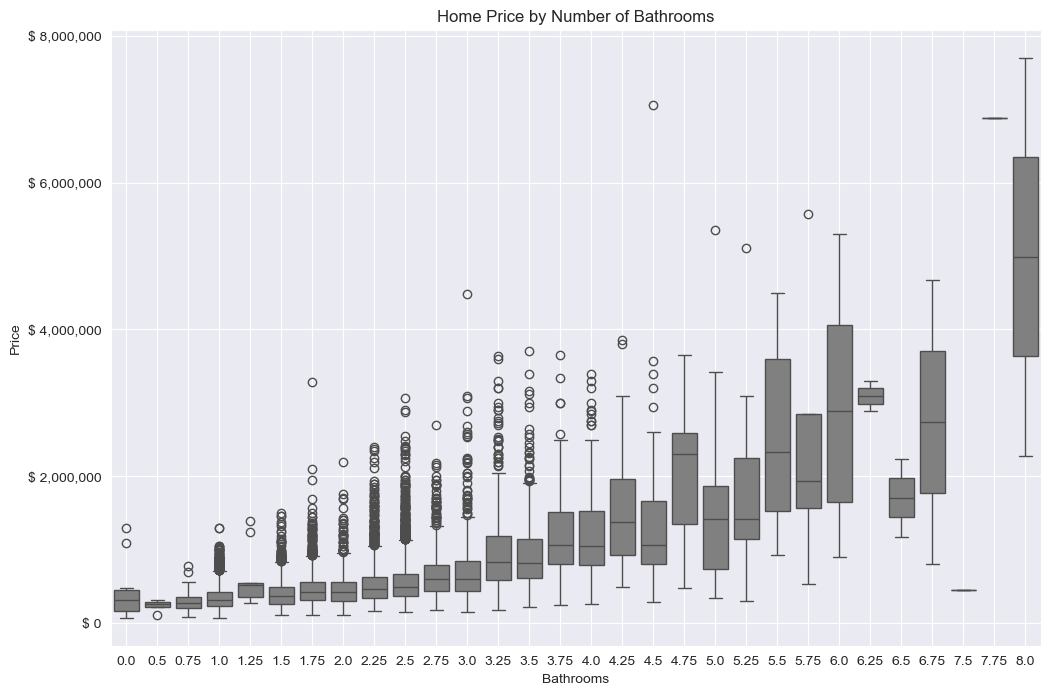

In [11]:
sns.set_style("darkgrid")
fig = plt.subplots(figsize = (12,8))
ax = sns.boxplot(x ='bathrooms', y='price', data = house, color = 'grey')
ax.yaxis.set_major_formatter('${x: ,.0f}')
ax.set_yticks(np.arange(0,ax.get_ylim()[1],2000000))
plt.title('Home Price by Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
ax.xaxis.grid(True)
plt.show()

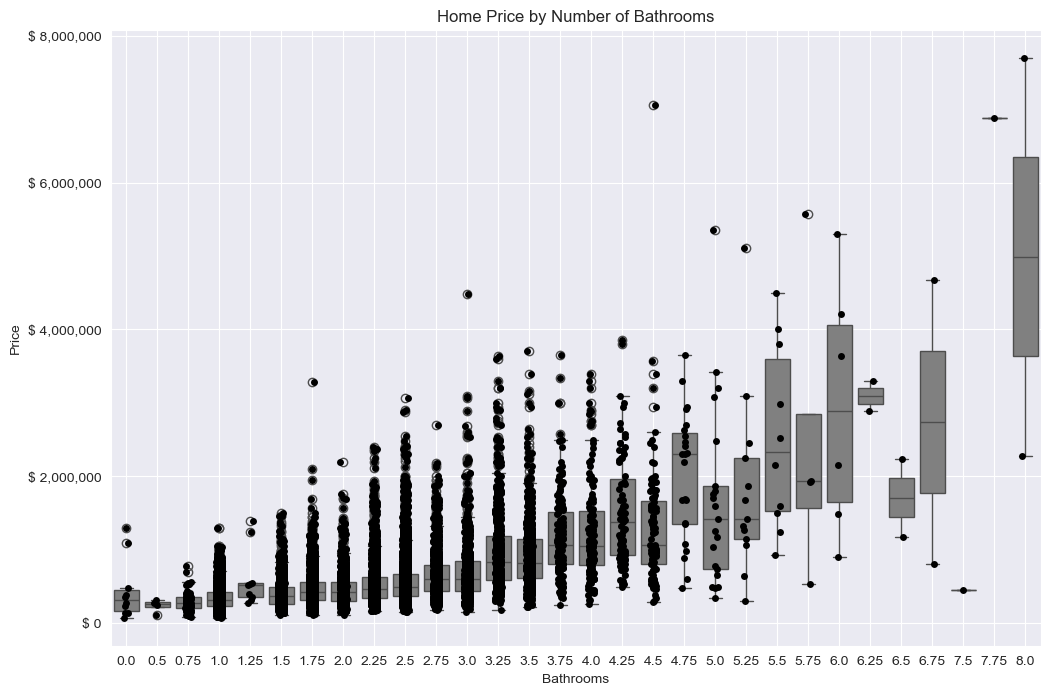

In [13]:
sns.set_style("darkgrid")
fig = plt.subplots(figsize = (12,8))
ax = sns.boxplot(house,x ='bathrooms',y='price',color = 'grey')
ax = sns.stripplot(house,x ='bathrooms',y='price',color = 'black',jitter = True)
ax.yaxis.set_major_formatter('${x: ,.0f}')
ax.set_yticks(np.arange(0,ax.get_ylim()[1],2000000))
plt.title('Home Price by Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
ax.xaxis.grid(True)
plt.show()

## Plot 5 - Scatter Plot to Analyze Home Size

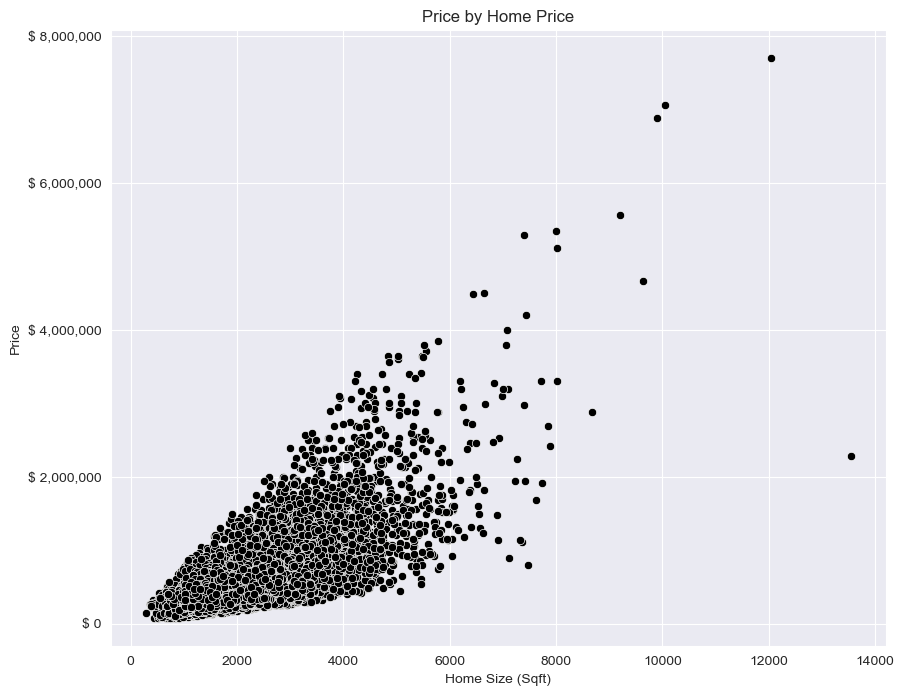

In [14]:
sns.set_style("darkgrid")
fig = plt.subplots(figsize = (10,8))
ax = sns.scatterplot(house,x ='sqft_living',y=house['price'],color = 'black')
ax.yaxis.set_major_formatter('${x: ,.0f}')
ax.set_yticks(np.arange(0,ax.get_ylim()[1],2000000))
plt.title('Price by Home Price')
plt.xlabel('Home Size (Sqft)')
plt.ylabel('Price')
ax.xaxis.grid(True)
plt.show()

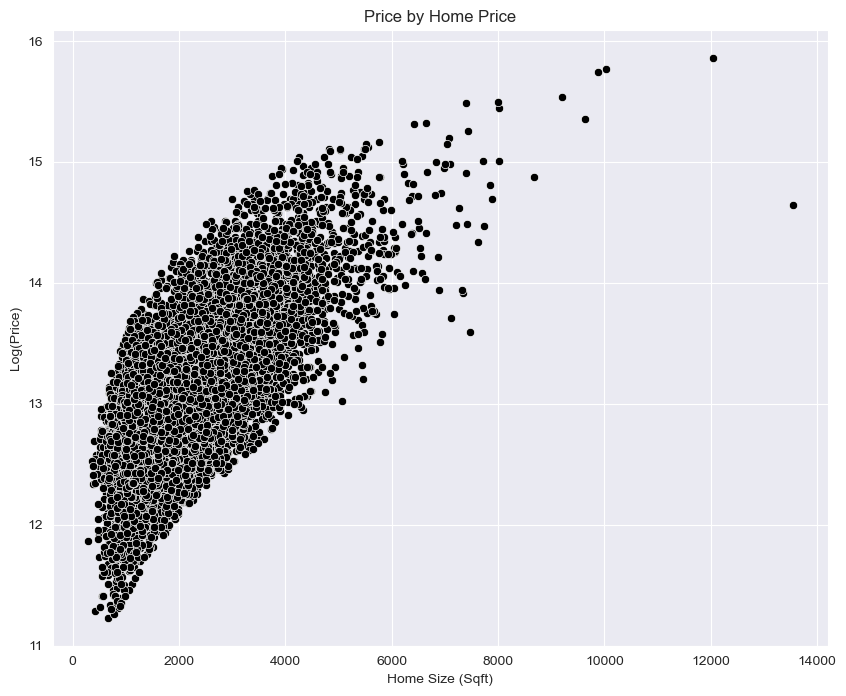

In [15]:
sns.set_style("darkgrid")
fig = plt.subplots(figsize = (10,8))
ax = sns.scatterplot(house,x ='sqft_living',y=np.log(house['price']),color = 'black')
plt.title('Price by Home Price')
plt.xlabel('Home Size (Sqft)')
plt.ylabel('Log(Price)')
ax.xaxis.grid(True)
plt.show()

## Plot 6 - Map of King County to Analyze Location

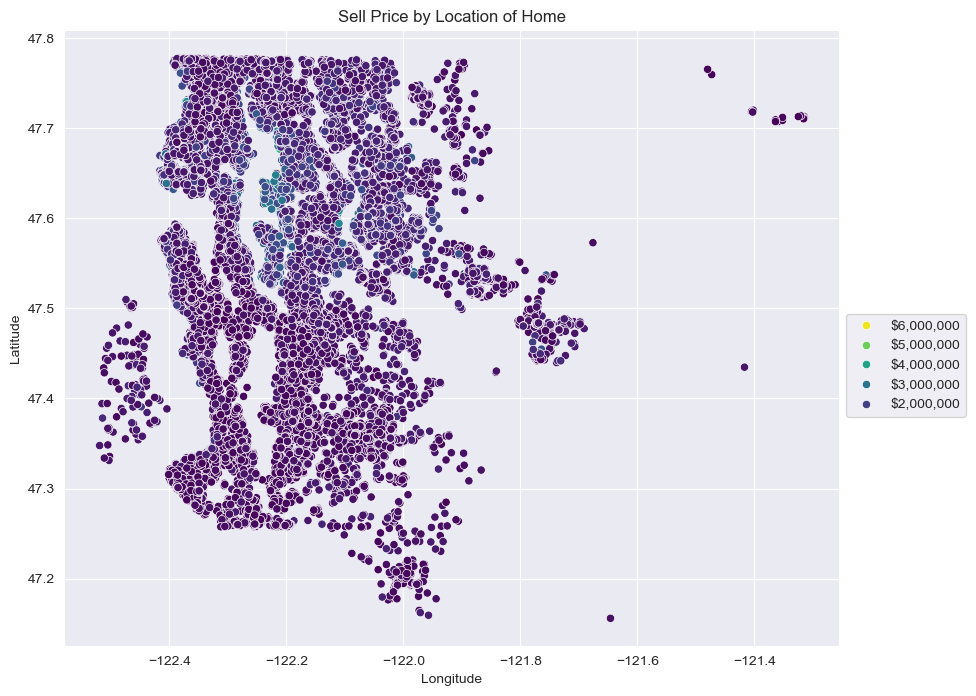

In [16]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,8))
sns.scatterplot(x = house['long'],y = house['lat'],hue= house['price'], 
                     palette='viridis', hue_order=list(np.arange(0,max(house['price']),1000000)[1:]))
plt.title('Sell Price by Location of Home')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.xaxis.grid(True)

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles[::-1],
          labels = list(map("${:,.0f}".format, list(np.arange(0,max(house['price']),1000000)[2:7][::-1]))),
           bbox_to_anchor = (1,.55))
plt.show()

## Plot 7 - Box and Whisker Plot to Analyze Waterfront Houses

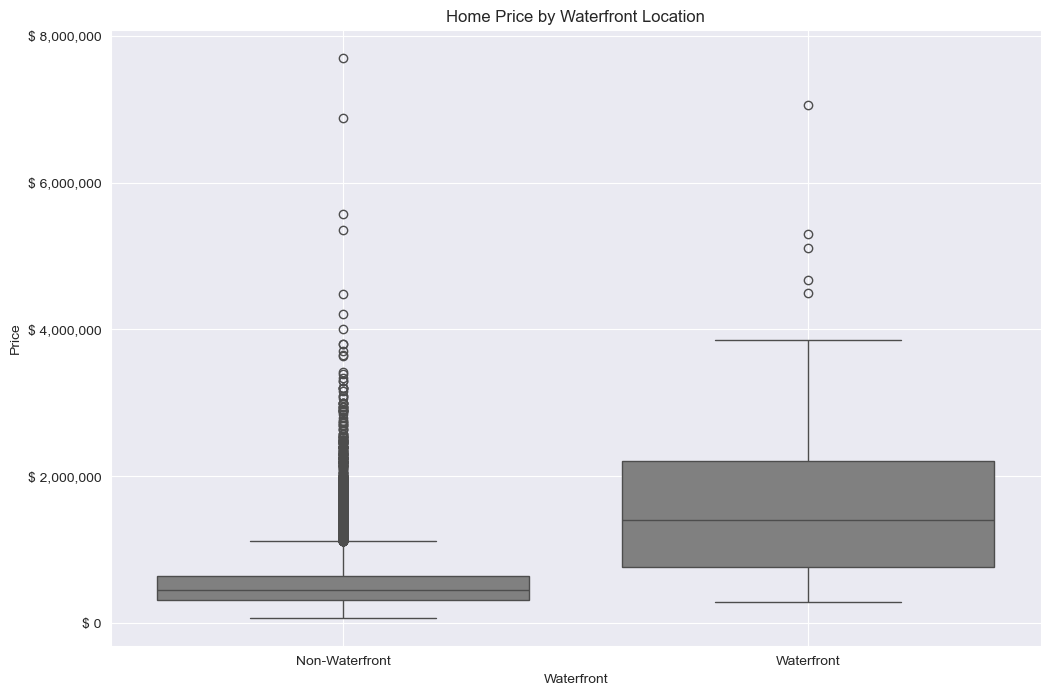

In [40]:
sns.set_style("darkgrid")
fig = plt.subplots(figsize = (12,8))
ax = sns.boxplot(house,x ='waterfront',y='price',color = 'grey')
ax.yaxis.set_major_formatter('${x: ,.0f}')
ax.set_yticks(np.arange(0,ax.get_ylim()[1],2000000))
ax.set_xticklabels(['Non-Waterfront','Waterfront'])
plt.title('Home Price by Waterfront Location')
plt.xlabel('Waterfront')
plt.ylabel('Price')
ax.xaxis.grid(True)
plt.show()